In [3]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import  roc_auc_score
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

In [32]:

train_set=pd.read_csv('train_set.csv')
test_set=pd.read_csv('test_set.csv')

In [33]:

# Find missing values in the training set
missing_values = train_set.isnull().sum()
print(missing_values[missing_values > 0])

# Find missing values in the test set
missing_values = test_set.isnull().sum()
print(missing_values[missing_values > 0])

X2     2590
X3     2139
X75     456
X76     444
X77     447
X78     447
dtype: int64
X2     1085
X3      971
X75     186
X76     198
X77     195
X78     195
dtype: int64


In [34]:
categorical_cols = []
numerical_cols = []

for column in train_set.columns:
  if train_set[column].dtype == object or train_set[column].nunique() < 10:
    categorical_cols.append(column)
  else:
    numerical_cols.append(column)

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['X4', 'X5', 'X6', 'X8', 'X10', 'X11', 'X16', 'Y']
Numerical Columns: ['RecordId', 'X2', 'X3', 'X7', 'X9', 'X12', 'X13', 'X14', 'X15', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X72', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78']


In [35]:
# Handle missing values for both train and test datasets
for column in categorical_cols:
  if column in train_set.columns and train_set[column].isnull().any():
    mode_imputer = SimpleImputer(strategy='most_frequent')
    train_set[column] = mode_imputer.fit_transform(train_set[[column]])
  if column in test_set.columns and test_set[column].isnull().any():
    if column in train_set.columns:
      mode_imputer = SimpleImputer(strategy='most_frequent')
      test_set[column] = mode_imputer.fit_transform(test_set[[column]])
    else:
      print(f"Warning: Column '{column}' is missing in the training set and cannot be imputed in the test set.")

for column in numerical_cols:
  if column in train_set.columns and train_set[column].isnull().any():
    mean_imputer = SimpleImputer(strategy='mean')
    train_set[column] = mean_imputer.fit_transform(train_set[[column]])
  if column in test_set.columns and test_set[column].isnull().any():
    if column in train_set.columns:
      mean_imputer = SimpleImputer(strategy='mean')
      test_set[column] = mean_imputer.fit_transform(test_set[[column]])
    else:
      print(f"Warning: Column '{column}' is missing in the training set and cannot be imputed in the test set.")

In [36]:
# Find missing values in the training set
missing_values = train_set.isnull().sum()
print(missing_values[missing_values > 0])

# Find missing values in the test set
missing_values = test_set.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)
Series([], dtype: int64)


In [ ]:
# # Calculate the correlation matrix
# correlation_matrix = train_set.corr()

# # Get the correlation of all columns with 'Y'
# correlation_with_y = correlation_matrix['Y']

# # Print the correlation values
# print(correlation_with_y)

In [ ]:

# # Keep only columns with correlation > 0 with 'Y' in the training set
# relevant_features = correlation_with_y[correlation_with_y > 0.01].index.tolist()

# # Print the number of relevant features
# print(f'Number of relevant features: {len(relevant_features)}')

# # Print the relevant features
# print('Relevant features:', relevant_features)

# # Set Y
# y = train_set['Y']

# if 'Y' in relevant_features:
#     relevant_features.remove('Y')

# # Select features for training
# X = train_set[relevant_features]

# # Test data
# X_testdata = test_set[relevant_features]

In [ ]:
# if 'RecordId' in X.columns:
#   X = X.drop('RecordId', axis=1)
# if 'RecordId' in X_testdata.columns:
#   X_testdata = X_testdata.drop('RecordId', axis=1)

In [37]:


# Assuming train_set and test_set are pandas DataFrames
# Get all columns except 'Y' for X
X = train_set[[col for col in train_set.columns if col != 'Y']]

# Get only 'Y' column for y
y = train_set['Y']

# Select the same features for the test data
X_testdata = test_set[[col for col in test_set.columns if col != 'Y']]

# ... rest of your code (scaling, feature selection, model training, etc.) ...
X.columns

Index(['RecordId', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30',
       'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40',
       'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50',
       'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60',
       'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70',
       'X71', 'X72', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78'],
      dtype='object')

In [38]:

if 'RecordId' in X.columns:
  X = X.drop('RecordId', axis=1)
if 'RecordId' in X_testdata.columns:
  X_testdata = X_testdata.drop('RecordId', axis=1)
X.columns

Index(['X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12',
       'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22',
       'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32',
       'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42',
       'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52',
       'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62',
       'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X72',
       'X73', 'X74', 'X75', 'X76', 'X77', 'X78'],
      dtype='object')

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
clf = DecisionTreeClassifier(max_depth=5)
sfs = SequentialFeatureSelector(clf, direction='forward',n_features_to_select=21, scoring='roc_auc', n_jobs=-1)
sfs.fit(X, y)
print(sfs.get_feature_names_out())

KeyboardInterrupt: 

In [31]:
selected_features = ['X5', 'X6','X8', 'X11', 'X14','X19', 'X22']

# Keep only the selected features in X
X = X[[col for col in X.columns if col in selected_features]]

# Keep the same selected features in X_testdata
X_testdata = X_testdata[[col for col in X_testdata.columns if col in selected_features]]
X.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [41]:
scalar=MinMaxScaler()
X = scalar.fit_transform(X)
X_testdata = scalar.transform(X_testdata)




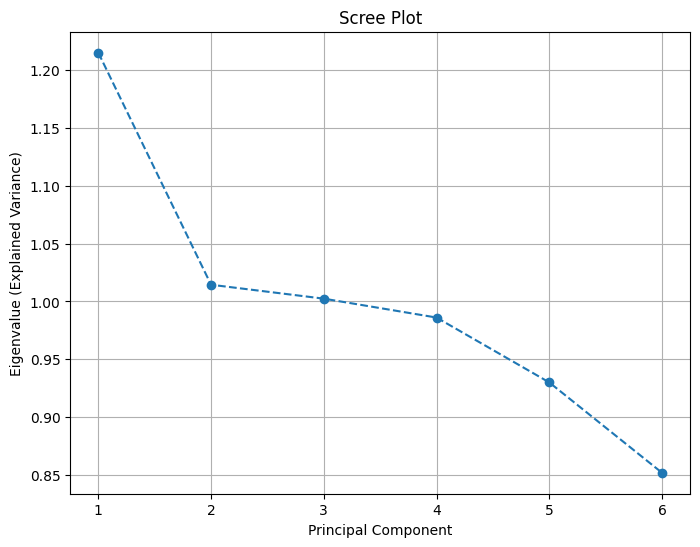

In [ ]:
# Step 1: Fit PCA on the scaled training data
pca = PCA().fit(X)

# Step 2: Plot the eigenvalues (variance explained by each component)
plt.figure(figsize=(8,6))
plt.plot(np.arange(1, len(pca.explained_variance_)+1), pca.explained_variance_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue (Explained Variance)')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
X_testdata_pca = pca.transform(X_testdata)

# Split the PCA-transformed data into training and test sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=2)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

# Try PCA with different numbers of components
for n in [5, 10, 15, 20]:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X)

    # Train the Decision Tree with PCA-transformed data
    clf = DecisionTreeClassifier(max_depth=5, min_samples_split=50, min_samples_leaf=5)
    scores = cross_val_score(clf, X_pca, y, cv=5, scoring='roc_auc')

    print(f'Number of Components: {n}, roc_auc: {scores.mean()}')


KeyboardInterrupt: 

In [42]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=1)

In [ ]:
clf = DecisionTreeClassifier(random_state=1)
param_grid = {
    'max_depth': [5, 7, 9, 10],
    'min_samples_split': [5, 10, 7, 20],
    'min_samples_leaf': [50, 250, 550,600]
}


# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

KeyboardInterrupt: 

In [43]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(
    n_estimators=1000,  #  number of trees
    max_depth=5,       # Limit tree depth to control overfitting
    min_samples_split=10,  # Minimum samples required to split
    min_samples_leaf=2,    # Minimum samples required at a leaf node
    max_features='sqrt',   # Randomly select a subset of features
    random_state=42,
    n_jobs=-1
)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=1000, n_jobs=-1, random_state=42)

In [ ]:
#adjust hyperparameters
clf = DecisionTreeClassifier()
clf.set_params(max_depth=5, min_samples_split=50, min_samples_leaf=5)

#train model
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=50)

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt

y_pred = clf.predict(X_test)
y_probs = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)



# Calculate AUC
auc_score = roc_auc_score(y_test, y_probs)
print(f'AUC: {auc_score}')

AUC: 0.9106768572448071


In [45]:

# Predict probabilities for the test set
y_test_probs = clf.predict_proba(X_testdata)[:, 1]

# Create a DataFrame with RecordId and predicted probabilities
test_set['Y_probability'] = y_test_probs

# Save the DataFrame to a CSV file
test_set[['RecordId', 'Y_probability']].to_csv('test_set_with_probabilities.csv', index=False)


import pandas as pd

# Read the generated CSV file
csv_file_path = 'test_set_with_probabilities.csv'
test_set_with_probabilities = pd.read_csv(csv_file_path)

# Get unique values in the Y_probability column
unique_y_probabilities = test_set_with_probabilities['Y_probability'].unique()

# Print the unique values
print(unique_y_probabilities)
print(test_set_with_probabilities)


[0.00112817 0.01551756 0.00099841 ... 0.00152625 0.00148121 0.08818613]
        RecordId  Y_probability
0         300001       0.001128
1         300002       0.015518
2         300003       0.000998
3         300004       0.001029
4         300005       0.001063
...          ...            ...
105477    405478       0.001008
105478    405479       0.088186
105479    405480       0.001011
105480    405481       0.002042
105481    405482       0.001044

[105482 rows x 2 columns]
